# Pymaceuticals
## Eric Roberts

HW5

[Conclusions](../cancer_drugs.pdf)


In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_db = pd.read_csv(mouse_drug_data_to_load)
clinic_db = pd.read_csv(clinical_trial_data_to_load)
mouse_db.head()
# Combine the data into a single dataset
mc_db = pd.merge(clinic_db, mouse_db, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mc_db.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mca_db = mc_db.copy()
mca_db = mca_db.groupby(['Drug','Timepoint'])
gd = mca_db.mean()
gd.head()
# Convert to DataFrame

# Preview DataFrame


Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
mcs_db = mc_db.copy()
mcs_db = mcs_db.groupby(['Drug','Timepoint'])
ss = mcs_db.sem()
del ss['Metastatic Sites']
del ss['Mouse ID']

# Preview DataFrame
ss.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
def minorMunge(ed, title):
    drugs = ed.index.levels[0]
    timepoints = ed.index.levels[1]
    data = list(ed[title])

    import array as arr
    numbers_array = arr.array('f', data)
    numbers_array[0:len(timepoints)]

    df = pd.DataFrame()
    indx = 0
    endx = len(timepoints)
    for drug in drugs:
        df[drug] = numbers_array[indx:endx].tolist()
        indx += len(timepoints)
        endx += len(timepoints)

    df["Timepoint"] = timepoints
    df.set_index("Timepoint",inplace = True)
    
    return df

In [5]:
import random
def rc():
    r = lambda: random.randint(0,255)
    x = ('#%02X%02X%02X' % (r(),r(),r()))
    return x

In [6]:
# Minor Data Munging to Re-Format the Data Frames
df = minorMunge(gd,'Tumor Volume (mm3)')
# Preview that Reformatting worked   
df.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266087,46.503052,47.062000,47.389175,46.796097,47.125587,47.248966,43.944859,47.527451,46.851818
10,43.084290,48.285126,49.403908,49.582268,48.694210,49.423328,49.101540,42.531956,49.463844,48.689880
15,42.064316,50.094055,51.296398,52.399975,50.933018,51.359741,51.067318,41.495060,51.529408,50.779060
20,40.716324,52.157047,53.197689,54.920937,53.644089,54.364418,53.346737,40.238323,54.067394,53.170334


In [7]:
ds = minorMunge(ss,'Tumor Volume (mm3)')
# Preview that Reformatting worked   
ds.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


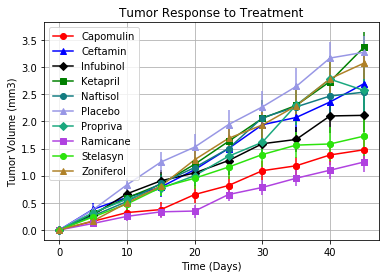

In [30]:
# Generate the Plot (with Error Bars)

# Save the Figure
drugs = df.keys()

colors = ['red','blue','black','green',rc(),rc(),rc(),rc(),rc(),rc()]
markers = ['o','^','D','s','o','^','D','s','o','^']

for i in range(10): #it wasn't clear from the homework whether you wanted the entire data or just to show the first 4
    plt.plot(df.index, df[drugs[i]], marker = markers[i],color=colors[i], label=drugs[i] )
    plt.errorbar(df.index, df[drugs[i]], ds[drugs[i]], color=colors[i],fmt=markers[i])

plt.legend(loc="upper left")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (Days)')

#with error bars


plt.title('Tumor Response to Treatment')
plt.grid(True)

# Save the Figure
plt.savefig("../Images/tumors1.png")
# Show the chart
plt.show()


## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
if 'Tumor Volume (mm3)' in gd.columns:
    del gd['Tumor Volume (mm3)']
gd.head()
# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame
mcs_db = mc_db.copy()
mcs_db = mcs_db.groupby(['Drug','Timepoint'])
ss = mcs_db.sem()
ss.columns

for c in ss.columns:
    if c != "Metastatic Sites":
        del ss[c]
        
ss.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
# Minor Data Munging to Re-Format the Data Frames
mcb_db = mc_db.copy()
mcb_db = mcb_db.groupby(['Drug','Timepoint'])
gd = mcb_db.mean()

df = minorMunge(gd,'Metastatic Sites')

df.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
ds = minorMunge(ss,'Metastatic Sites')

ds.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


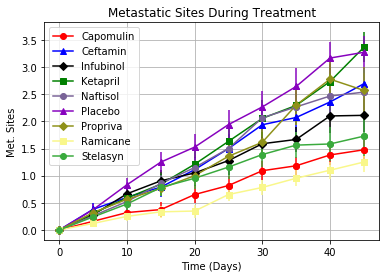

In [31]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure
# Save the Figure
drugs = df.keys()

colors = ['red','blue','black','green',rc(),rc(),rc(),rc(),rc(),rc()]
markers = ['o','^','D','s','o','^','D','s','o','^']

for i in range(9): #want more data?  Increase this number.
    plt.plot(df.index, df[drugs[i]], marker = markers[i],color=colors[i], label=drugs[i] )
    plt.errorbar(df.index, df[drugs[i]], ds[drugs[i]], color=colors[i],fmt=markers[i])

plt.legend(loc="upper left")
plt.ylabel('Met. Sites')
plt.xlabel('Time (Days)')

#with error bars


plt.title('Metastatic Sites During Treatment')
plt.grid(True)

# Save the Figure
plt.savefig("../Images/tumors2.png")
# Show the chart
plt.show()



## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mcb_db = mc_db.copy()
mcb_db = mcb_db.groupby(['Drug','Timepoint'])
gg = mcb_db.count()


for c in gg.columns:
    if c != "Mouse ID":
        del gg[c]
        
gg.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [15]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
hu = minorMunge(gg,'Mouse ID')
hu.head()


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25.0,25.0,25.0,25.0,25.0,25.0,26.0,25.0,26.0,25.0
5,25.0,21.0,25.0,23.0,23.0,24.0,25.0,25.0,25.0,24.0
10,25.0,20.0,21.0,22.0,21.0,24.0,23.0,24.0,23.0,22.0
15,24.0,19.0,21.0,19.0,21.0,20.0,17.0,24.0,23.0,21.0
20,23.0,18.0,20.0,19.0,20.0,19.0,17.0,23.0,21.0,17.0


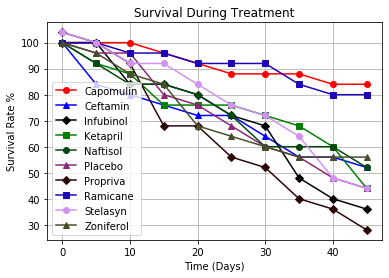

In [29]:
hu = minorMunge(gg,'Mouse ID')

drugs = hu.keys()

hu = (hu/25)*100

colors = ['red','blue','black','green',rc(),rc(),rc(),rc(),rc(),rc()]
markers = ['o','^','D','s','o','^','D','s','o','^']

for i in range(10): #change this number if you want more than 4 plots
    plt.plot(hu.index, hu[drugs[i]], marker = markers[i],color=colors[i], label=drugs[i] )

plt.legend(loc="lower left")
plt.ylabel('Survival Rate %')
plt.xlabel('Time (Days)')

#with error bars


plt.title('Survival During Treatment')
plt.grid(True)
# Show the chart

# Save the Figure
plt.savefig("../Images/mice.png")
plt.show()


In [17]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure


## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [19]:
mcc_db = mc_db.copy()
mcc_db = mcc_db.groupby(['Drug','Timepoint'])
gd = mcc_db.mean()
gd.head()

timepoints = gd.index.levels[1]
drugs = gd.index.levels[0]
percchgdrug = {}

for drug in drugs:
    percent_change =  ((gd.loc[drug,timepoints.max()]['Tumor Volume (mm3)'] - gd.loc[drug,0]['Tumor Volume (mm3)']) / gd.loc[drug,0]['Tumor Volume (mm3)'])
    percent_change = percent_change * 100
    percchgdrug[drug] = percent_change
    
percchgdrug

{'Capomulin': -19.475302667894173,
 'Ceftamin': 42.516491855897414,
 'Infubinol': 46.12347172785184,
 'Ketapril': 57.028794686606076,
 'Naftisol': 53.92334713476923,
 'Placebo': 51.29796048315153,
 'Propriva': 47.24117486320634,
 'Ramicane': -22.320900462766673,
 'Stelasyn': 52.08513428789896,
 'Zoniferol': 46.57975086509525}

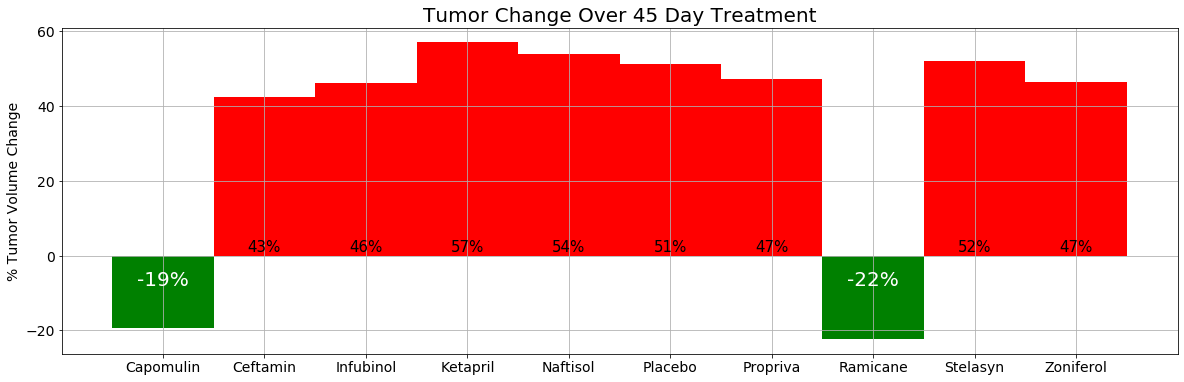

In [24]:
# Store all Relevant Percent Changes into a Tuple
pc = []
for d in percchgdrug:
   pc.append(percchgdrug[d])

cities = percchgdrug
p = tuple(pc)

colorbars = []
for px in p:
    if (px < 0):
        colorbars.append("g")
    else:
        colorbars.append("r")
        
x_axis = np.arange(len(percchgdrug))
plt.figure(figsize=(20,6))
plt.title('Tumor Change Over 45 Day Treatment',fontsize=20)
plt.grid(True)
plt.bar(x_axis, p, width = 1,color=colorbars, align="center")

plt.xticks(x_axis, percchgdrug,fontsize=14)
plt.yticks(np.arange(-20, 70, 20),fontsize=14)

plt.ylabel('% Tumor Volume Change',fontsize=14)

i = 0
height = 0
labelcolor = ""
fontsz = 15
for px in p:
    if (px < 0):
        labelcolor = "white"
        height = -8
        fontsz = 20
    else:
        labelcolor = "black"
        height = 1
        fontsz = 15
    plt.text(i,height, "{0:.0f}".format(px)+"%", fontsize=fontsz, ha='center',color=labelcolor)
    i=i+1


# Splice the data between passing and failing drugs

# Orient widths. Add labels, tick marks, etc. 

# Use functions to label the percentages of changes

# Call functions to implement the function calls (oh, OK)

# Save the Figure


# Show the Figure

plt.savefig("../Images/tumorchange.jpg")
plt.show()
